# Cross-validation

In [1]:
import pandas as pd
df = pd.read_csv("winequality-red.csv", delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
# a mapping dictionary that maps the quality values from 0 to 5
q_min, q_max = df.quality.min(), df.quality.max()
quality_mapping = {q_old: q_new for q_old, q_new in zip(range(q_min, q_max + 1), range(q_max - q_min + 1))}
quality_mapping

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [3]:
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [4]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected
# for training
df_train = df.head(1000)

# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

In [5]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [6]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

train_accuracy, test_accuracy

(0.571, 0.5258764607679466)

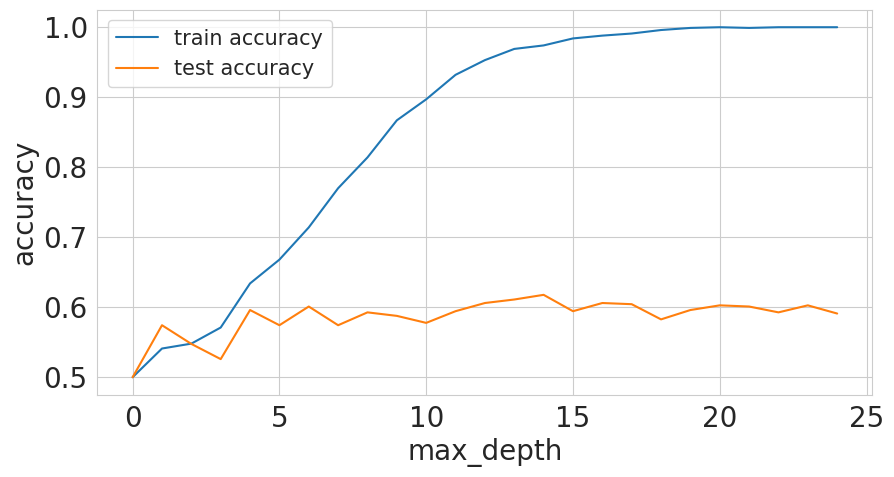

In [7]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics

# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # columns/features for training
    # note that, this can be done outside
    # the loop
    cols = [
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
    ]
    
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [8]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection

if None:
    # Training data is in a CSV file called train.csv
    df = pd.read_csv("train.csv")
    
    # we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
    
    # initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)
    
    # fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
    
    # save the new csv with kfold column
    df.to_csv("train_folds.csv", index=False)

In [9]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection

if None:
    # Training data is in a csv file called train.csv
    df = pd.read_csv("train.csv")
    
    # we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
    
    # fetch targets
    y = df.target.values
    
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_, 'kfold'] = f
    
    # save the new csv with kfold column
    df.to_csv("train_folds.csv", index=False)

Text(0, 0.5, 'count')

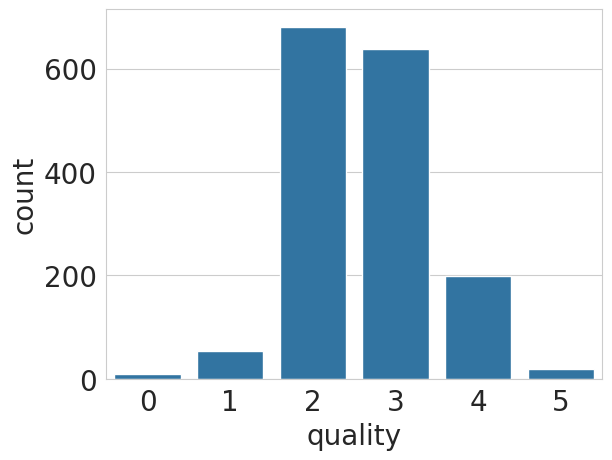

In [10]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [11]:
# stratified-kfold for regression
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    # we create a new column called kfold and fill it with -1
    data["kfold"] = -1
    
    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    
    # calculate the number of bins by Sturge's rule
    # I take the floor of the value, you can also
    # just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))
    
    # bin targets
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False
    )
    
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    # note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
    
    # drop the bins column
    data = data.drop("bins", axis=1)
    
    # return dataframe with folds
    return data

# we create a sample dataset with 15000 samples
# and 100 features and 1 target
X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1
)

# create a dataframe out of our numpy arrays
df = pd.DataFrame(
    X,
    columns=[f"f_{i}" for i in range(X.shape[1])]
)
df.loc[:, "target"] = y

# create folds
df = create_folds(df)